<a href="https://colab.research.google.com/github/francomanca93/fundamentos-de-estadistica-con-python/blob/inferencias-estadisticas/5.%20Realizar%20inferencias%20estadisticas%20a%20partir%20de%20una%20muestra/14_Pruebas_de_hip%C3%B3tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba de hipótesis

Con los conceptos aprendidos podemos crear juicios de valor sobre las variables aleatorias. Una primera técnica para realizar esto es la **prueba de hipótesis**

Una **prueba de hipótesis** es una regla que especifica si se puede aceptar o rechazar una afirmación acerca de un **parámetro poblacional** (lambda, sigma, mu, etc.) dependiendo de la evidencia proporcionada por una muestra de datos (x1, x2, x3, ...,xn)

## Pasos y elementos de una prueba de hipótesis

1. Identificar el parámetro poblacional por el cual vamos a hacer inferencia (**θ, λ, μ, σ, σ²**, etc)
2. Definir dos hipótesis:
  
  a. Hipótesis nula (siempre de igualdad = )

 - La hipótesis nula indica que un parámetro de población (tal como la media, la desviación estándar, etc.) es igual a un valor hipotético. La hipótesis nula suele ser una afirmación inicial que se basa en análisis previos o en conocimiento especializado.

  b. Hipótesis alterna (mayor que >, menor que <, o diferente que ≠)

 - La hipótesis alternativa indica que un parámetro de población es más pequeño, más grande o diferente del valor hipotético de la hipótesis nula. La hipótesis alternativa es lo que podríamos pensar que es cierto o esperamos probar que es cierto.


3. Identificar el mejor estimador (Promedio muestral o varianza muestral)
4. Identificar el estadístico (el que mezcla el estimador y el parámetro poblacional) y la distribución asociada a ese estimador para calcular probabilidades (normal, t-student, chi-cuadrada, F-fisher, etc).
5. Debemos asignar el valor estadistico que va a tener la prueba, H0.
6. Tolerancia de error que vamos a definir para nuestra prueba de hipótesis. Valor crítico y criterio de rechazo de H0.
7. Conclusión de rechazo o no rechazo de H0 con un margen de error de alfa.


# Caso de aplicación

La empresa Mustage S.A. está desarrollando una plataforma para otorgar créditos de bajo monto y por ello requiere evaluar el tiempo que le va a tomar a cada uno de sus clientes acceder a la aplicación y solicitar un crédito.

El tiempo que tarde el usuario en ingresar a la aplicación y pedir un crédito es una variable importante para medir la experiencia de usuario.

El tiempo para completar exitosamente una consulta de información de clientes ante las fuentes de buro **no debe ser superior a 30 segundos** en **promedio**

Muestra de **n = 50** clientes consultados.

La empresa está dispuesta a asumir un error del 5% en la prueba.

**¿El proveedor de información satisface estadísticamente este requerimiento?**

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy.stats import expon
from scipy.stats import uniform

In [2]:
# Asumimos que la población es exponencial
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56,
           47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 
           32, 37, 32, 34, 48, 20, 48, 51, 27, 24,
           39, 40, 31, 34, 23, 24, 41, 58, 44, 48,
           31, 23, 27, 55, 43, 47, 30, 57, 38, 51]

In [3]:
# Tamaño de la muestra
len(muestra)

50

In [4]:
# Nuestra hipotesis estará basada en la media de nuestra variable exponencial

from scipy.stats import expon

# Media, varianza, asimetria, kurtosis; scale = 30 que es el valor de la hipotesis H0
media, var, skew, kurt = expon.stats(scale = 30, moments = 'mvsk')

In [7]:
# Paso 1: Parametro lambda
# Paso 2: Generar hipotesis
mu = 30
mu > 30

# Paso 3: Mejor estimador
# Elejimos el promedio, porque nuestra distribución es exponencial y por teorema de limite central conoceremos a este valor.

# Paso 4: Definimos la distribución de estudio
# Nuestra distribución será normal 

promedio = np.mean(muestra)
promedio

40.66

In [12]:
# Paso 5: Calculo del valor del estadistico
desv = np.sqrt(var / len(muestra)) # Desviación de la variable original exponencial, dividimos por el temaño de la muestra
z = (promedio - mu) / desv
z

2.5125860958161983

In [15]:
# Paso 6: Definir criterio de rechazo y torelancia al error

alpha = 0.05

# Criterios de rechazo
from scipy.stats import norm
data_norm = norm.rvs(size = 1000000)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribucion normal')

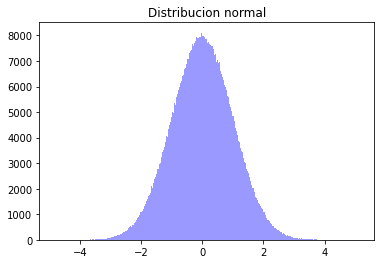

In [17]:
ax = sns.distplot(data_norm, bins = 500, kde = False, color = 'blue')
ax.set_title('Distribucion normal')

In [19]:
# Visualizar las regiones de aceptación y rechazo
# 
valor_critico = norm.ppf(1-alpha, loc = 0, scale = 1)
valor_critico 

1.6448536269514722

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


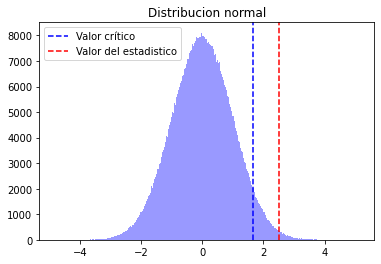

In [23]:
ax = sns.distplot(data_norm, bins = 500, kde = False, color = 'blue')
ax.set_title('Distribucion normal')
ax.axvline(x = valor_critico, linestyle = '--', label = 'Valor crítico', color='blue')
ax.axvline(x = z, linestyle = '--', label = 'Valor del estadistico', color='red')
ax.legend()

Del valor critico a la derecha se acumula una probabilidad del 5% de error. Antes de ese valor se acumula una probabilidad del 95% de NO error.

La linea roja es el valor Z, valor de nuestro estadistico. Ese es el valor que toma la relacion entre nuestroa parámetro poblacional y la muestra calculada.

Todo lo que esta por encima de la linea azul es poco probabe bajo los valores del estimador, los valores poblacionales de la variable aleatoria.

Con lo calculado y graficado podemos decir con suficiente prueba estadistica que mu es diferente de 30 e irnos en favor a la hipotesis alterna, donde mu probablemente sea mayor a 30. 

El caso de la empresa Mustage estaria a favor de que el tiempo que tarda una persona en loggearse y poder acceder a un credito es mayor que los requerimientos que necesitan sobre el proveedor. En otras palabras es muy poco probable que en promedio la empresa pueda cumplir con el criterio pedido.

Las pruebas de hipotesis nos permiten evidenciar que tan probable es que nuestro valor poblacion, mu,  tenga un valor dado o superior dada una muestra. 

En realidad no importa de cual distribución partamos ya que gracias al teorema del limite central todas las distribuciones las podemos caracterizar con la distribución normal. También recordar que este ejemplo es para la Prueba de hipótesis de medias, existen otros tipos de pruebas de hipótesis pero tienen una estructura procedimental similar.

![casos_de_pruebas_de_hipotesis](https://imgur.com/ZCKsCwV.png)